In [ ]:
import pandas as pd 
import glob 
import os 
import matplotlib.pyplot as plt
import numpy as np


### Preparation of the results of IVON

In [2]:
seeds = [0,1,2]
update_methods = ["wb_diag"]
personalization_methods = ["wb_diag"]

In [3]:
for dataset_name in ['svhn', 'fmnist', 'cifar10']:
    results =  {'Seed': [], "Update_method": [], "Personalization_method": [], "Lambda": [], "Iter": [], "Client": [], "Dataset": [], "ACC": [], "NLL": [], "ECE": []}
    for seed in seeds: 
        for update_method in update_methods: 
            for perso_m in personalization_methods:
                dir = f"../logs/ivon/{dataset_name}/{seed}/BFLAVG/{update_method}/results/"
                
                global_on_global_file = os.path.join(dir, f"global_on_global.csv")
                glob_on_glob_df = pd.read_csv(global_on_global_file)

                results['Seed'].append(seed)
                results['Personalization_method'].append("None")
                results['Update_method'].append(update_method)
                results['Lambda'].append(0)
                results['Iter'].append(-1)
                results['Client'].append('G')
                results['Dataset'].append('G')
                results["ACC"].append(glob_on_glob_df['Acc'].iloc[-1])
                results["NLL"].append(glob_on_glob_df['NLL'].iloc[-1])
                results["ECE"].append(glob_on_glob_df['ECE'].iloc[-1])                
                
                for id in range(10):
                    
                    local_on_local_file = os.path.join(dir, f"local_on_local/client_{id}_on_local_data.csv")
                    loc_df = pd.read_csv(local_on_local_file)

                    results['Seed'].append(seed)
                    results['Personalization_method'].append("None")
                    results['Update_method'].append(update_method)
                    results['Lambda'].append("infinity")
                    results['Iter'].append(-1)
                    results['Client'].append(id)
                    results['Dataset'].append(id)
                    results["ACC"].append(loc_df['Acc'].iloc[-1])
                    results["NLL"].append(loc_df['NLL'].iloc[-1])
                    results["ECE"].append(loc_df['ECE'].iloc[-1])

                    local_on_global_file = os.path.join(dir, f"local_on_global/client_{id}_on_global_data.csv")
                    glob_df = pd.read_csv(local_on_global_file)

                    results['Seed'].append(seed)
                    results['Personalization_method'].append("None")
                    results['Update_method'].append(update_method)
                    results['Lambda'].append("infinity")
                    results['Iter'].append(-1)
                    results['Client'].append(id)
                    results['Dataset'].append('G')
                    results["ACC"].append(glob_df['Acc'].iloc[-1])
                    results["NLL"].append(glob_df['NLL'].iloc[-1])
                    results["ECE"].append(glob_df['ECE'].iloc[-1])


                    global_on_local_file = os.path.join(dir, f"global_on_local/global_on_local_data_{id}.csv")
                    glob_on_loc_df = pd.read_csv(global_on_local_file)

                    results['Seed'].append(seed)
                    results['Personalization_method'].append("None")
                    results['Update_method'].append(update_method)
                    results['Lambda'].append(0)
                    results['Iter'].append(-1)
                    results['Client'].append('G')
                    results['Dataset'].append(id)
                    results["ACC"].append(glob_on_loc_df['Acc'].iloc[-1])
                    results["NLL"].append(glob_on_loc_df['NLL'].iloc[-1])
                    results["ECE"].append(glob_on_loc_df['ECE'].iloc[-1])



                    for lambda_ in [0.25, 0.5, 1, 1.5, 2]:
                        perso_on_local_file = os.path.join(dir, f"personalized/{perso_m}/{lambda_}/perso_on_local/perso_{id}_on_local_data.csv")
                        perso_on_loc_df = pd.read_csv(perso_on_local_file)
                        
                        results['Seed'].append(seed)
                        results['Personalization_method'].append(perso_m)
                        results['Update_method'].append(update_method)
                        results['Lambda'].append(lambda_)
                        results['Iter'].append(-1)
                        results['Client'].append(f'Perso_{id}')
                        results['Dataset'].append(id)
                        results["ACC"].append(perso_on_loc_df['Acc'].iloc[-1])
                        results["NLL"].append(perso_on_loc_df['NLL'].iloc[-1])
                        results["ECE"].append(perso_on_loc_df['ECE'].iloc[-1])

                        perso_on_global_file = os.path.join(dir, f"personalized/{perso_m}/{lambda_}/perso_on_global/perso_{id}_on_global_data.csv")
                        perso_on_glob_df = pd.read_csv(perso_on_global_file)

                        results['Seed'].append(seed)
                        results['Personalization_method'].append(perso_m)
                        results['Update_method'].append(update_method)
                        results['Lambda'].append(lambda_)
                        results['Iter'].append(-1)
                        results['Client'].append(f'Perso_{id}')
                        results['Dataset'].append('G')
                        results["ACC"].append(perso_on_glob_df['Acc'].iloc[-1])
                        results["NLL"].append(perso_on_glob_df['NLL'].iloc[-1])
                        results["ECE"].append(perso_on_glob_df['ECE'].iloc[-1])

    df = pd.DataFrame(data=results)
    # Save the results to a CSV file
    output_dir = "../logs/ivon/csv_results"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = os.path.join(output_dir, f"{dataset_name}_results.csv")
    df.to_csv(output_file, index=False)


### Preparation of the results of HBDL

In [4]:
seeds = [0,1,2]
update_methods = ["wb_diag", "rkl"]
nbls = [1,2,3]

In [5]:
for dataset_name in ['svhn', 'fmnist', 'cifar10']:

    results =  {'Seed': [], "Nbl": [], "Update_method": [], "Iter": [], "Client": [], "Dataset": [], "ACC": [], "NLL": [], "ECE": []}
    for seed in seeds: 
        for update_method in update_methods: 
            for nbl in nbls:
                dir = f"../logs/{dataset_name}/{seed}/BFLAVG/{update_method}/{nbl}/results/"
                for id in range(10):
                    
                    local_on_local_file = os.path.join(dir, f"local_on_local/client_{id}_on_local_data.csv")
                    loc_df = pd.read_csv(local_on_local_file)

                    results['Seed'].append(seed)
                    results['Nbl'].append(nbl)
                    results['Update_method'].append(update_method)
                    results['Iter'].append(-1)
                    results['Client'].append(id)
                    results['Dataset'].append(id)
                    results["ACC"].append(loc_df['Acc'].iloc[-1])
                    results["NLL"].append(loc_df['NLL'].iloc[-1])
                    results["ECE"].append(loc_df['ECE'].iloc[-1])

                    local_on_global_file = os.path.join(dir, f"local_on_global/client_{id}_on_global_data.csv")
                    glob_df = pd.read_csv(local_on_global_file)

                    results['Seed'].append(seed)
                    results['Nbl'].append(nbl)
                    results['Update_method'].append(update_method)
                    results['Iter'].append(-1)
                    results['Client'].append(id)
                    results['Dataset'].append('G')
                    results["ACC"].append(glob_df['Acc'].iloc[-1])
                    results["NLL"].append(glob_df['NLL'].iloc[-1])
                    results["ECE"].append(glob_df['ECE'].iloc[-1])


                    global_on_local_file = os.path.join(dir, f"global_on_local/global_on_local_data_{id}.csv")
                    glob_on_loc_df = pd.read_csv(global_on_local_file)

                    results['Seed'].append(seed)
                    results['Nbl'].append(nbl)
                    results['Update_method'].append(update_method)
                    results['Iter'].append(-1)
                    results['Client'].append('G')
                    results['Dataset'].append(id)
                    results["ACC"].append(glob_on_loc_df['Acc'].iloc[-1])
                    results["NLL"].append(glob_on_loc_df['NLL'].iloc[-1])
                    results["ECE"].append(glob_on_loc_df['ECE'].iloc[-1])

    df = pd.DataFrame(data=results)
    # Save the results to a CSV file
    output_dir = "../logs/HBDL"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = os.path.join(output_dir, f"{dataset_name}_results.csv")
    df.to_csv(output_file, index=False)

## Preparation of the results of FedAVG

In [6]:
seeds = [0,1,2]

In [7]:
for dataset_name in ['svhn', 'fmnist', 'cifar10']:
    results =  {'Seed': [], "Iter": [], "Client": [], "Dataset": [], "ACC": [], "NLL": [], "ECE": []}
    for seed in seeds: 
        dir = f"../logs/{dataset_name}/{seed}/FedAVG/results/"
        for id in range(10):
            
            local_on_local_file = os.path.join(dir, f"local_on_local/client_{id}_on_local_data.csv")
            loc_df = pd.read_csv(local_on_local_file)

            results['Seed'].append(seed)
            results['Iter'].append(-1)
            results['Client'].append(id)
            results['Dataset'].append(id)
            results["ACC"].append(loc_df['Acc'].iloc[-1])
            results["NLL"].append(loc_df['NLL'].iloc[-1])
            results["ECE"].append(loc_df['ECE'].iloc[-1])

            local_on_global_file = os.path.join(dir, f"local_on_global/client_{id}_on_global_data.csv")
            glob_df = pd.read_csv(local_on_global_file)

            results['Seed'].append(seed)
            results['Iter'].append(-1)
            results['Client'].append(id)
            results['Dataset'].append('G')
            results["ACC"].append(glob_df['Acc'].iloc[-1])
            results["NLL"].append(glob_df['NLL'].iloc[-1])
            results["ECE"].append(glob_df['ECE'].iloc[-1])


            global_on_local_file = os.path.join(dir, f"global_on_local/global_on_local_data_{id}.csv")
            glob_on_loc_df = pd.read_csv(global_on_local_file)

            results['Seed'].append(seed)
            results['Iter'].append(-1)
            results['Client'].append('G')
            results['Dataset'].append(id)
            results["ACC"].append(glob_on_loc_df['Acc'].iloc[-1])
            results["NLL"].append(glob_on_loc_df['NLL'].iloc[-1])
            results["ECE"].append(glob_on_loc_df['ECE'].iloc[-1])

    df = pd.DataFrame(data=results)
    # Save the results to a CSV file
    output_dir = "../logs/FedAVG"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = os.path.join(output_dir, f"{dataset_name}_results.csv")
    df.to_csv(output_file, index=False)

##  Utils

In [8]:
# Define function that takes a dataframe and a metric name
def compute_stats_per_metric(df, metric):
    last_iter = df['Iter'].max()
    df_last = df[df['Iter'] == last_iter]

    df_last["Client"] = df_last["Client"].astype(str)
    df_last["Dataset"] = df_last["Dataset"].astype(str)

    is_local = df_last['Client'] != 'G'
    is_global = df_last['Client'] == 'G'
    on_local = df_last['Dataset'] != 'G'
    on_global = df_last['Dataset'] == 'G'

    local_on_local = df_last[is_local & on_local]
    local_on_global = df_last[is_local & on_global]
    global_on_local = df_last[is_global & on_local]

    if metric == "ACC":
        return {
            f"{metric}_avg_local_local": local_on_local[metric].mean(),
            f"{metric}_worst_local_local": local_on_local[metric].min(),
            f"{metric}_avg_local_global": local_on_global[metric].mean(),
            f"{metric}_worst_local_global": local_on_global[metric].min(),
            f"{metric}_avg_global_local": global_on_local[metric].mean(),
            f"{metric}_worst_global_local": global_on_local[metric].min()
        }
    else :
        return {
            f"{metric}_avg_local_local": local_on_local[metric].mean(),
            f"{metric}_worst_local_local": local_on_local[metric].max(),
            f"{metric}_avg_local_global": local_on_global[metric].mean(),
            f"{metric}_worst_local_global": local_on_global[metric].max(),
            f"{metric}_avg_global_local": global_on_local[metric].mean(),
            f"{metric}_worst_global_local": global_on_local[metric].max()
        }

# Sort columns so each avg is followed by its corresponding std
def sort_avg_std_columns(columns):
    base_names = sorted(set(col.rsplit("_", 1)[0] for col in columns))
    sorted_cols = []
    for base in base_names:
        avg_col = f"{base}_avg"
        std_col = f"{base}_std"
        if avg_col in columns:
            sorted_cols.append(avg_col)
        if std_col in columns:
            sorted_cols.append(std_col)
    return sorted_cols

# Prepare melted DataFrame for plotting
def make_long_form(df, acc_col, std_col, acc_type):
    df_acc = df[['dataset', 'method', acc_col, std_col]].copy()
    df_acc = df_acc.rename(columns={acc_col: 'acc', std_col: 'std'})
    df_acc['acc_type'] = acc_type
    return df_acc

In [9]:
# Define function that takes a dataframe and a metric name
def compute_stats_ivon_per_metric(df, metric, lambda_=1):
    last_iter = df['Iter'].max()
    df_last = df[df['Iter'] == last_iter]
    #df_last = df_last[df['Update_method'] == 'wb_diag']

    df_last["Client"] = df_last["Client"].astype(str)
    df_last["Dataset"] = df_last["Dataset"].astype(str)

    is_global = df_last['Client'] == 'G'
    on_global = df_last['Dataset'] == 'G'
    on_local = df_last['Dataset'] != 'G'
    is_perso = df_last['Client'].str.startswith('Perso')


    #is_local = not (is_global or is_perso)
    is_local = ~(is_global | is_perso)
    is_lambda = df_last['Lambda'] == lambda_


    local_on_local = df_last[is_local & on_local]
    local_on_global = df_last[is_local & on_global]
    global_on_local = df_last[is_global & on_local]
    perso_on_local = df_last[is_perso & on_local & is_lambda]
    #perso_on_local = perso_on_local['Personalization_method' == 'wb_diag']
    perso_on_global = df_last[is_perso & on_global & is_lambda]
    #perso_on_global = perso_on_global['Personalization_method' == 'wb_diag']


    if metric == "ACC":
        return {
            f"{metric}_avg_local_local": local_on_local[metric].mean(),
            f"{metric}_worst_local_local": local_on_local[metric].min(),
            f"{metric}_avg_local_global": local_on_global[metric].mean(),
            f"{metric}_worst_local_global": local_on_global[metric].min(),
            f"{metric}_avg_global_local": global_on_local[metric].mean(),
            f"{metric}_worst_global_local": global_on_local[metric].min(),
            f"{metric}_avg_perso_local": perso_on_local[metric].mean(),
            f"{metric}_worst_perso_local": perso_on_local[metric].min(),
            f"{metric}_avg_perso_global": perso_on_global[metric].mean(),
            f"{metric}_worst_perso_global": perso_on_global[metric].min()
        }
    else :
        return {
            f"{metric}_avg_local_local": local_on_local[metric].mean(),
            f"{metric}_worst_local_local": local_on_local[metric].max(),
            f"{metric}_avg_local_global": local_on_global[metric].mean(),
            f"{metric}_worst_local_global": local_on_global[metric].max(),
            f"{metric}_avg_global_local": global_on_local[metric].mean(),
            f"{metric}_worst_global_local": global_on_local[metric].max(), 
            f"{metric}_avg_perso_local": perso_on_local[metric].mean(),
            f"{metric}_worst_perso_local": perso_on_local[metric].max(),
            f"{metric}_avg_perso_global": perso_on_global[metric].mean(),
            f"{metric}_worst_perso_global": perso_on_global[metric].max()
        }

## Cifar10

In [10]:
dataset_name = 'cifar10'

### pFedBayes

In [11]:
# List all seed files
csv_dir = "../logs/pfedbayes"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"pFedBayes_{dataset_name}_*.csv")))

In [12]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_pFedBayes = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_pFedBayes.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 63.8536
ACC_avg_global_local_std: 1.8631
ACC_avg_local_global_avg: 44.4820
ACC_avg_local_global_std: 1.8548
ACC_avg_local_local_avg: 71.8442
ACC_avg_local_local_std: 1.7859
ACC_worst_global_local_avg: 56.2439
ACC_worst_global_local_std: 2.9696
ACC_worst_local_global_avg: 34.1067
ACC_worst_local_global_std: 0.5065
ACC_worst_local_local_avg: 60.3331
ACC_worst_local_local_std: 1.7428


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Capfl

In [13]:
# List all seed files
csv_dir = "../logs/capfl"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"capfl_{dataset_name}_*.csv")))

In [14]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_capfl = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_capfl.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 60.9838
ACC_avg_global_local_std: 1.7795
ACC_avg_local_global_avg: 45.8790
ACC_avg_local_global_std: 1.7951
ACC_avg_local_local_avg: 72.6127
ACC_avg_local_local_std: 1.8194
ACC_worst_global_local_avg: 53.5496
ACC_worst_global_local_std: 1.5760
ACC_worst_local_global_avg: 36.1500
ACC_worst_local_global_std: 1.2972
ACC_worst_local_local_avg: 64.1416
ACC_worst_local_local_std: 2.7082


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Fedpop

In [15]:
# List all seed files
csv_dir = "../logs/fedpop"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"FedPop_{dataset_name}_*.csv")))

In [16]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedpop = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedpop.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 4.8104
ACC_avg_global_local_std: 4.3230
ACC_avg_local_global_avg: 52.0460
ACC_avg_local_global_std: 3.3307
ACC_avg_local_local_avg: 80.5105
ACC_avg_local_local_std: 1.9890
ACC_worst_global_local_avg: 0.0323
ACC_worst_global_local_std: 0.0559
ACC_worst_local_global_avg: 40.4367
ACC_worst_local_global_std: 2.5844
ACC_worst_local_local_avg: 72.6299
ACC_worst_local_local_std: 3.3361


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### HBDL

In [17]:
# Re-import required libraries after code environment reset
import pandas as pd

# Load example CSV file again
csv_path = f"../logs/HBDL/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)

# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Nbl,Update_method,Iter,Client,Dataset,ACC,NLL,ECE
0,0,1,wb_diag,-1,0,0,77.022972,0.736047,11.160456
1,0,1,wb_diag,-1,0,G,41.939999,4.404731,40.050079
2,0,1,wb_diag,-1,G,0,62.337662,1.113369,11.462046
3,0,1,wb_diag,-1,1,1,73.300003,0.923155,13.210599
4,0,1,wb_diag,-1,1,G,42.909996,3.149851,36.462200
...,...,...,...,...,...,...,...,...,...
535,2,3,rkl,-1,8,G,49.319996,2.146923,23.971050
536,2,3,rkl,-1,G,8,55.744255,1.273321,12.588405
537,2,3,rkl,-1,9,9,86.386383,0.431785,6.765380
538,2,3,rkl,-1,9,G,44.480000,2.704295,33.465885


In [18]:
df_wb = df_last[df_last['Update_method'] == 'wb_diag']
df_wb_1 = df_wb[df_wb['Nbl'] == 1]
df_wb_2 = df_wb[df_wb['Nbl'] == 2]
df_wb_3 = df_wb[df_wb['Nbl'] == 3]
df_rkl = df_last[df_last['Update_method'] == 'rkl']
df_rkl_1 = df_rkl[df_rkl['Nbl'] == 1]
df_rkl_2 = df_rkl[df_rkl['Nbl'] == 2]
df_rkl_3 = df_rkl[df_rkl['Nbl'] == 3]


#### WB_1

In [19]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_1[df_wb_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 63.3497
ACC_avg_global_local_std: 3.7496
ACC_avg_local_global_avg: 46.7750
ACC_avg_local_global_std: 1.7681
ACC_avg_local_local_avg: 75.9631
ACC_avg_local_local_std: 0.9406
ACC_worst_global_local_avg: 55.5635
ACC_worst_global_local_std: 5.1719
ACC_worst_local_global_avg: 37.6067
ACC_worst_local_global_std: 2.3509
ACC_worst_local_local_avg: 67.8333
ACC_worst_local_local_std: 1.1151


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1041231771.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_2

In [20]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_2[df_wb_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 64.8434
ACC_avg_global_local_std: 5.3509
ACC_avg_local_global_avg: 48.7897
ACC_avg_local_global_std: 2.6664
ACC_avg_local_local_avg: 77.8463
ACC_avg_local_local_std: 0.7585
ACC_worst_global_local_avg: 56.7899
ACC_worst_global_local_std: 8.5230
ACC_worst_local_global_avg: 37.8133
ACC_worst_local_global_std: 1.4236
ACC_worst_local_local_avg: 70.6333
ACC_worst_local_local_std: 0.9452


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2845748694.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_3

In [21]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_3[df_wb_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 63.9739
ACC_avg_global_local_std: 4.8562
ACC_avg_local_global_avg: 48.8650
ACC_avg_local_global_std: 2.1869
ACC_avg_local_local_avg: 78.9225
ACC_avg_local_local_std: 0.9664
ACC_worst_global_local_avg: 54.0922
ACC_worst_global_local_std: 8.1072
ACC_worst_local_global_avg: 39.0667
ACC_worst_local_global_std: 1.5818
ACC_worst_local_local_avg: 71.0333
ACC_worst_local_local_std: 2.0817


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/3899111581.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_1

In [22]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_1[df_rkl_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 63.3232
ACC_avg_global_local_std: 4.1356
ACC_avg_local_global_avg: 46.4800
ACC_avg_local_global_std: 2.3883
ACC_avg_local_local_avg: 75.9098
ACC_avg_local_local_std: 1.2774
ACC_worst_global_local_avg: 55.6913
ACC_worst_global_local_std: 5.5025
ACC_worst_local_global_avg: 37.0133
ACC_worst_local_global_std: 1.3900
ACC_worst_local_local_avg: 67.6333
ACC_worst_local_local_std: 3.3858


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2777935379.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_2

In [23]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_2[df_rkl_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 64.9935
ACC_avg_global_local_std: 5.9915
ACC_avg_local_global_avg: 48.6210
ACC_avg_local_global_std: 2.1061
ACC_avg_local_local_avg: 77.9664
ACC_avg_local_local_std: 0.8430
ACC_worst_global_local_avg: 56.6495
ACC_worst_global_local_std: 8.0758
ACC_worst_local_global_avg: 38.0167
ACC_worst_local_global_std: 1.1055
ACC_worst_local_local_avg: 70.5000
ACC_worst_local_local_std: 1.1358


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/153764893.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_3

In [24]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_3[df_rkl_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 63.9933
ACC_avg_global_local_std: 4.9063
ACC_avg_local_global_avg: 48.7463
ACC_avg_local_global_std: 1.7835
ACC_avg_local_local_avg: 78.7392
ACC_avg_local_local_std: 1.5236
ACC_worst_global_local_avg: 54.0146
ACC_worst_global_local_std: 9.1293
ACC_worst_local_global_avg: 38.9200
ACC_worst_local_global_std: 2.2628
ACC_worst_local_local_avg: 70.5667
ACC_worst_local_local_std: 2.9263


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2258926112.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### FedAVG

In [25]:
# Load example CSV file again
csv_path = f"../logs/FedAVG/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)


# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Iter,Client,Dataset,ACC,NLL,ECE
0,0,-1,0,0,76.923080,0.801327,11.898292
1,0,-1,0,G,41.100002,4.684654,40.548820
2,0,-1,G,0,60.639362,1.251173,13.481874
3,0,-1,1,1,74.000000,1.020548,13.413069
4,0,-1,1,G,42.459999,3.617453,38.451038
...,...,...,...,...,...,...,...
85,2,-1,8,G,47.650002,3.367827,36.170052
86,2,-1,G,8,54.045952,1.505783,20.820013
87,2,-1,9,9,82.982979,0.754959,11.229271
88,2,-1,9,G,42.680000,4.102732,43.590992


In [26]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedavg = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedavg.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 61.2405
ACC_avg_global_local_std: 4.7752
ACC_avg_local_global_avg: 45.8887
ACC_avg_local_global_std: 2.2003
ACC_avg_local_local_avg: 74.8034
ACC_avg_local_local_std: 1.0112
ACC_worst_global_local_avg: 52.3147
ACC_worst_global_local_std: 7.8654
ACC_worst_local_global_avg: 36.7833
ACC_worst_local_global_std: 0.2631
ACC_worst_local_local_avg: 65.8000
ACC_worst_local_local_std: 1.6462


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/996959071.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### IVON

In [27]:
# Load example CSV file again
csv_path = f"../logs/ivon/csv_results/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)


# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Update_method,Personalization_method,Lambda,Iter,Client,Dataset,ACC,NLL,ECE
0,0,wb_diag,NaN,0.00,-1,G,G,64.860001,1.014603,6.517796
1,0,wb_diag,NaN,inf,-1,0,0,78.921082,0.610350,7.940001
2,0,wb_diag,NaN,inf,-1,0,G,43.599998,3.368246,34.092003
3,0,wb_diag,NaN,0.00,-1,G,0,63.536465,1.084501,11.077344
4,0,wb_diag,wb_diag,0.25,-1,Perso_0,0,70.129868,0.848369,7.895366
...,...,...,...,...,...,...,...,...,...,...
388,2,wb_diag,wb_diag,1.00,-1,Perso_9,G,59.520000,1.208707,10.891723
389,2,wb_diag,wb_diag,1.50,-1,Perso_9,9,84.584579,0.471232,6.896720
390,2,wb_diag,wb_diag,1.50,-1,Perso_9,G,55.379997,1.409882,15.999588
391,2,wb_diag,wb_diag,2.00,-1,Perso_9,9,84.784782,0.471279,6.520759


In [28]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
lambda_ = 1
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_ivon_per_metric(df, metric, lambda_))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_ivon_1 = final_stats[sorted_columns] #lambda_ = 1

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_ivon_1.items():
    print(f"{k}: {float(v):.4f}")

/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1366964487.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


ACC_avg_global_local_avg: 65.3930
ACC_avg_global_local_std: 4.0472
ACC_avg_local_global_avg: 47.4577
ACC_avg_local_global_std: 2.8240
ACC_avg_local_local_avg: 76.7865
ACC_avg_local_local_std: 0.3225
ACC_avg_perso_global_avg: 57.7547
ACC_avg_perso_global_std: 2.4808
ACC_avg_perso_local_avg: 76.8204
ACC_avg_perso_local_std: 0.4205
ACC_worst_global_local_avg: 58.0890
ACC_worst_global_local_std: 6.0240
ACC_worst_local_global_avg: 37.7233
ACC_worst_local_global_std: 1.0796
ACC_worst_local_local_avg: 68.2667
ACC_worst_local_local_std: 0.5859
ACC_worst_perso_global_avg: 45.2800
ACC_worst_perso_global_std: 0.9198
ACC_worst_perso_local_avg: 70.6333
ACC_worst_perso_local_std: 0.6351


### All methods

In [29]:
df_all = pd.concat([sorted_final_stats_ivon_1, sorted_final_stats_fedavg, sorted_final_stats_pFedBayes, sorted_final_stats_capfl, sorted_final_stats_fedpop,
                   sorted_final_stats_wb1, sorted_final_stats_wb2, sorted_final_stats_wb3,
                   sorted_final_stats_rkl1, sorted_final_stats_rkl2, sorted_final_stats_rkl3], axis=0)
df_all.index = ['Ours', 'FedAVG','pFedBayes', 'pFedVem', 'FedPop',
                'wb_1', 'wb_2', 'wb_3',
                'rkl_1', 'rkl_2', 'rkl_3']
df_all_cifar10 = df_all.copy()

In [30]:
df_all_cifar10

,ACC_avg_global_local_avg,ACC_avg_global_local_std,ACC_avg_local_global_avg,ACC_avg_local_global_std,ACC_avg_local_local_avg,ACC_avg_local_local_std,ACC_avg_perso_global_avg,ACC_avg_perso_global_std,ACC_avg_perso_local_avg,ACC_avg_perso_local_std,ACC_worst_global_local_avg,ACC_worst_global_local_std,ACC_worst_local_global_avg,ACC_worst_local_global_std,ACC_worst_local_local_avg,ACC_worst_local_local_std,ACC_worst_perso_global_avg,ACC_worst_perso_global_std,ACC_worst_perso_local_avg,ACC_worst_perso_local_std
Ours,65.393001,4.047245,47.457666,2.823999,76.786527,0.322492,57.754667,2.480837,76.82042,0.420484,58.088984,6.024016,37.723334,1.079554,68.266665,0.585946,45.28,0.919838,70.633334,0.635084
FedAVG,61.240459,4.775228,45.888667,2.200299,74.803365,1.011177,NaN,NaN,NaN,NaN,52.314682,7.865436,36.783333,0.263122,65.800001,1.646205,NaN,NaN,NaN,NaN
pFedBayes,63.853553,1.863119,44.482000,1.854779,71.844210,1.785929,NaN,NaN,NaN,NaN,56.243856,2.969608,34.106665,0.506493,60.333125,1.742825,NaN,NaN,NaN,NaN
pFedVem,60.983837,1.779494,45.879000,1.795082,72.612714,1.819438,NaN,NaN,NaN,NaN,53.549632,1.575975,36.150000,1.297228,64.141613,2.708176,NaN,NaN,NaN,NaN
FedPop,4.810413,4.323047,52.046000,3.330685,80.510467,1.989004,NaN,NaN,NaN,NaN,0.032268,0.055891,40.436666,2.584420,72.629868,3.336125,NaN,NaN,NaN,NaN
wb_1,63.349718,3.749581,46.775000,1.768128,75.963124,0.940596,NaN,NaN,NaN,NaN,55.563469,5.171932,37.606667,2.350858,67.833336,1.115052,NaN,NaN,NaN,NaN
wb_2,64.843376,5.350936,48.789666,2.666414,77.846282,0.758517,NaN,NaN,NaN,NaN,56.789917,8.523002,37.813333,1.423601,70.633336,0.945157,NaN,NaN,NaN,NaN
wb_3,63.973891,4.856244,48.864998,2.186853,78.922525,0.966366,NaN,NaN,NaN,NaN,54.092205,8.107199,39.066666,1.581782,71.033335,2.081665,NaN,NaN,NaN,NaN
rkl_1,63.323201,4.135616,46.479999,2.388263,75.909840,1.277430,NaN,NaN,NaN,NaN,55.691348,5.502496,37.013332,1.390048,67.633336,3.385752,NaN,NaN,NaN,NaN
rkl_2,64.993522,5.991545,48.620999,2.106136,77.966382,0.843050,NaN,NaN,NaN,NaN,56.649518,8.075848,38.016666,1.105547,70.500005,1.135780,NaN,NaN,NaN,NaN


In [31]:
# Create LaTeX table with \pm format for avg ± std
latex_df = df_all.copy()
for metric in ['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']:
    avg_col = f'{metric}_avg'
    std_col = f'{metric}_std'
    latex_df[metric] = latex_df.apply(lambda row: f"{row[avg_col]:.2f} $\\pm$ {row[std_col]:.2f}", axis=1)

# Keep only formatted columns
latex_df = latex_df[['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']]

latex_df


,ACC_avg_local_global,ACC_avg_local_local,ACC_avg_perso_global,ACC_avg_perso_local,ACC_worst_local_global,ACC_worst_local_local,ACC_worst_perso_global,ACC_worst_perso_local
Ours,47.46 $\pm$ 2.82,76.79 $\pm$ 0.32,57.75 $\pm$ 2.48,76.82 $\pm$ 0.42,37.72 $\pm$ 1.08,68.27 $\pm$ 0.59,45.28 $\pm$ 0.92,70.63 $\pm$ 0.64
FedAVG,45.89 $\pm$ 2.20,74.80 $\pm$ 1.01,nan $\pm$ nan,nan $\pm$ nan,36.78 $\pm$ 0.26,65.80 $\pm$ 1.65,nan $\pm$ nan,nan $\pm$ nan
pFedBayes,44.48 $\pm$ 1.85,71.84 $\pm$ 1.79,nan $\pm$ nan,nan $\pm$ nan,34.11 $\pm$ 0.51,60.33 $\pm$ 1.74,nan $\pm$ nan,nan $\pm$ nan
pFedVem,45.88 $\pm$ 1.80,72.61 $\pm$ 1.82,nan $\pm$ nan,nan $\pm$ nan,36.15 $\pm$ 1.30,64.14 $\pm$ 2.71,nan $\pm$ nan,nan $\pm$ nan
FedPop,52.05 $\pm$ 3.33,80.51 $\pm$ 1.99,nan $\pm$ nan,nan $\pm$ nan,40.44 $\pm$ 2.58,72.63 $\pm$ 3.34,nan $\pm$ nan,nan $\pm$ nan
wb_1,46.77 $\pm$ 1.77,75.96 $\pm$ 0.94,nan $\pm$ nan,nan $\pm$ nan,37.61 $\pm$ 2.35,67.83 $\pm$ 1.12,nan $\pm$ nan,nan $\pm$ nan
wb_2,48.79 $\pm$ 2.67,77.85 $\pm$ 0.76,nan $\pm$ nan,nan $\pm$ nan,37.81 $\pm$ 1.42,70.63 $\pm$ 0.95,nan $\pm$ nan,nan $\pm$ nan
wb_3,48.86 $\pm$ 2.19,78.92 $\pm$ 0.97,nan $\pm$ nan,nan $\pm$ nan,39.07 $\pm$ 1.58,71.03 $\pm$ 2.08,nan $\pm$ nan,nan $\pm$ nan
rkl_1,46.48 $\pm$ 2.39,75.91 $\pm$ 1.28,nan $\pm$ nan,nan $\pm$ nan,37.01 $\pm$ 1.39,67.63 $\pm$ 3.39,nan $\pm$ nan,nan $\pm$ nan
rkl_2,48.62 $\pm$ 2.11,77.97 $\pm$ 0.84,nan $\pm$ nan,nan $\pm$ nan,38.02 $\pm$ 1.11,70.50 $\pm$ 1.14,nan $\pm$ nan,nan $\pm$ nan


In [32]:
# # Generate LaTeX code
# latex_code = latex_df.to_latex(escape=False)

# latex_code

## Fmnist

In [34]:
dataset_name = 'fmnist'

### pFedBayes

In [35]:
# List all seed files
csv_dir = "../logs/pfedbayes"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"pFedBayes_{dataset_name}_*.csv")))

In [36]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_pFedBayes = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_pFedBayes.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.9972
ACC_avg_global_local_std: 0.4372
ACC_avg_local_global_avg: 77.5133
ACC_avg_local_global_std: 1.2136
ACC_avg_local_local_avg: 91.4186
ACC_avg_local_local_std: 0.0306
ACC_worst_global_local_avg: 78.6237
ACC_worst_global_local_std: 5.4591
ACC_worst_local_global_avg: 68.6900
ACC_worst_local_global_std: 3.1921
ACC_worst_local_local_avg: 86.4913
ACC_worst_local_local_std: 1.4413


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Capfl

In [37]:
# List all seed files
csv_dir = "../logs/capfl"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"capfl_{dataset_name}_*.csv")))

In [38]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_capfl = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_capfl.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 89.4940
ACC_avg_global_local_std: 0.2676
ACC_avg_local_global_avg: 80.7413
ACC_avg_local_global_std: 1.8898
ACC_avg_local_local_avg: 92.9995
ACC_avg_local_local_std: 0.2970
ACC_worst_global_local_avg: 82.8648
ACC_worst_global_local_std: 2.8773
ACC_worst_local_global_avg: 71.4333
ACC_worst_local_global_std: 5.3877
ACC_worst_local_local_avg: 88.4760
ACC_worst_local_local_std: 1.1839


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Fedpop

In [39]:
# List all seed files
csv_dir = "../logs/fedpop"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"FedPop_{dataset_name}_*.csv")))

In [40]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedpop = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedpop.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 1.6673
ACC_avg_global_local_std: 2.8455
ACC_avg_local_global_avg: 6.5277
ACC_avg_local_global_std: 1.2781
ACC_avg_local_local_avg: 98.3536
ACC_avg_local_local_std: 0.0445
ACC_worst_global_local_avg: 1.1679
ACC_worst_global_local_std: 2.0229
ACC_worst_local_global_avg: 5.8600
ACC_worst_local_global_std: 1.2706
ACC_worst_local_local_avg: 97.7382
ACC_worst_local_local_std: 0.1620


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### HBDL

In [41]:
# Re-import required libraries after code environment reset
import pandas as pd

# Load example CSV file again
csv_path = f"../logs/HBDL/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)

# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Nbl,Update_method,Iter,Client,Dataset,ACC,NLL,ECE
0,0,1,wb_diag,-1,0,0,90.800003,0.663325,8.479876
1,0,1,wb_diag,-1,0,G,76.220001,2.160312,20.538147
2,0,1,wb_diag,-1,G,0,86.800003,0.695890,10.275873
3,0,1,wb_diag,-1,1,1,88.677361,0.821571,9.999880
4,0,1,wb_diag,-1,1,G,82.549995,1.363435,14.053744
...,...,...,...,...,...,...,...,...,...
535,2,3,rkl,-1,8,G,75.129997,1.477476,17.470760
536,2,3,rkl,-1,G,8,88.388390,0.441623,6.149021
537,2,3,rkl,-1,9,9,91.816368,0.316751,5.409121
538,2,3,rkl,-1,9,G,79.369995,1.048482,12.600374


In [42]:
df_wb = df_last[df_last['Update_method'] == 'wb_diag']
df_wb_1 = df_wb[df_wb['Nbl'] == 1]
df_wb_2 = df_wb[df_wb['Nbl'] == 2]
df_wb_3 = df_wb[df_wb['Nbl'] == 3]
df_rkl = df_last[df_last['Update_method'] == 'rkl']
df_rkl_1 = df_rkl[df_rkl['Nbl'] == 1]
df_rkl_2 = df_rkl[df_rkl['Nbl'] == 2]
df_rkl_3 = df_rkl[df_rkl['Nbl'] == 3]


#### WB_1

In [43]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_1[df_wb_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.7598
ACC_avg_global_local_std: 0.4667
ACC_avg_local_global_avg: 78.9603
ACC_avg_local_global_std: 1.8841
ACC_avg_local_local_avg: 92.8130
ACC_avg_local_local_std: 0.3000
ACC_worst_global_local_avg: 80.4230
ACC_worst_global_local_std: 3.4251
ACC_worst_local_global_avg: 65.7567
ACC_worst_local_global_std: 8.0114
ACC_worst_local_local_avg: 88.5553
ACC_worst_local_local_std: 0.1496


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1041231771.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_2

In [44]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_2[df_wb_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.1768
ACC_avg_global_local_std: 0.8272
ACC_avg_local_global_avg: 77.4590
ACC_avg_local_global_std: 1.8103
ACC_avg_local_local_avg: 92.3830
ACC_avg_local_local_std: 0.0711
ACC_worst_global_local_avg: 78.5905
ACC_worst_global_local_std: 5.7411
ACC_worst_local_global_avg: 62.1633
ACC_worst_local_global_std: 7.0253
ACC_worst_local_local_avg: 87.1542
ACC_worst_local_local_std: 1.0442


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2845748694.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_3

In [45]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_3[df_wb_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.8334
ACC_avg_global_local_std: 0.8581
ACC_avg_local_global_avg: 76.0987
ACC_avg_local_global_std: 2.1671
ACC_avg_local_local_avg: 92.1460
ACC_avg_local_local_std: 0.4121
ACC_worst_global_local_avg: 78.2884
ACC_worst_global_local_std: 4.5828
ACC_worst_local_global_avg: 58.5400
ACC_worst_local_global_std: 6.2862
ACC_worst_local_local_avg: 86.1522
ACC_worst_local_local_std: 1.6145


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/3899111581.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_1

In [46]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_1[df_rkl_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.2997
ACC_avg_global_local_std: 0.5278
ACC_avg_local_global_avg: 78.9567
ACC_avg_local_global_std: 1.7526
ACC_avg_local_local_avg: 92.2962
ACC_avg_local_local_std: 0.3341
ACC_worst_global_local_avg: 79.6553
ACC_worst_global_local_std: 2.6237
ACC_worst_local_global_avg: 66.4433
ACC_worst_local_global_std: 5.8298
ACC_worst_local_local_avg: 87.4540
ACC_worst_local_local_std: 0.3590


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2777935379.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_2

In [47]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_2[df_rkl_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.3166
ACC_avg_global_local_std: 0.6328
ACC_avg_local_global_avg: 77.2573
ACC_avg_local_global_std: 2.2578
ACC_avg_local_local_avg: 92.3362
ACC_avg_local_local_std: 0.2979
ACC_worst_global_local_avg: 80.6563
ACC_worst_global_local_std: 3.9344
ACC_worst_local_global_avg: 64.0767
ACC_worst_local_global_std: 10.0759
ACC_worst_local_local_avg: 86.7534
ACC_worst_local_local_std: 1.7639


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/153764893.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_3

In [48]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_3[df_rkl_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.3369
ACC_avg_global_local_std: 1.2657
ACC_avg_local_global_avg: 76.4637
ACC_avg_local_global_std: 2.3382
ACC_avg_local_local_avg: 92.4262
ACC_avg_local_local_std: 0.2919
ACC_worst_global_local_avg: 78.7242
ACC_worst_global_local_std: 6.1436
ACC_worst_local_global_avg: 60.9000
ACC_worst_local_global_std: 8.0771
ACC_worst_local_local_avg: 87.3203
ACC_worst_local_local_std: 1.0581


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2258926112.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### FedAVG

In [49]:
# Load example CSV file again
csv_path = f"../logs/FedAVG/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)


# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Iter,Client,Dataset,ACC,NLL,ECE
0,0,-1,0,0,89.000000,0.801112,10.035150
1,0,-1,0,G,76.040001,2.277173,21.372860
2,0,-1,G,0,85.000000,0.928797,12.706021
3,0,-1,1,1,86.472946,1.007036,12.424664
4,0,-1,1,G,81.779999,1.558000,15.622697
...,...,...,...,...,...,...,...
85,2,-1,8,G,78.500000,1.934394,18.578850
86,2,-1,G,8,89.289291,0.593450,9.140848
87,2,-1,9,9,90.518967,0.621624,8.598911
88,2,-1,9,G,79.079994,1.743267,17.741119


In [50]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedavg = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedavg.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.8932
ACC_avg_global_local_std: 0.8544
ACC_avg_local_global_avg: 79.1173
ACC_avg_local_global_std: 2.1011
ACC_avg_local_local_avg: 92.2830
ACC_avg_local_local_std: 0.0362
ACC_worst_global_local_avg: 78.5558
ACC_worst_global_local_std: 4.1885
ACC_worst_local_global_avg: 68.3267
ACC_worst_local_global_std: 7.5139
ACC_worst_local_local_avg: 86.7243
ACC_worst_local_local_std: 1.4663


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/996959071.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### IVON

In [51]:
# Load example CSV file again
csv_path = f"../logs/ivon/csv_results/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)


# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Update_method,Personalization_method,Lambda,Iter,Client,Dataset,ACC,NLL,ECE
0,0,wb_diag,NaN,0.00,-1,G,G,88.669998,0.462717,6.866752
1,0,wb_diag,NaN,inf,-1,0,0,88.900002,0.568009,9.136699
2,0,wb_diag,NaN,inf,-1,0,G,73.529999,2.082206,22.032307
3,0,wb_diag,NaN,0.00,-1,G,0,86.599998,0.549114,9.239990
4,0,wb_diag,wb_diag,0.25,-1,Perso_0,0,88.000000,0.471232,8.377968
...,...,...,...,...,...,...,...,...,...,...
388,2,wb_diag,wb_diag,1.00,-1,Perso_9,G,82.110001,0.920563,13.021419
389,2,wb_diag,wb_diag,1.50,-1,Perso_9,9,93.413177,0.280157,5.613192
390,2,wb_diag,wb_diag,1.50,-1,Perso_9,G,81.110001,1.075454,14.163127
391,2,wb_diag,wb_diag,2.00,-1,Perso_9,9,93.213570,0.295554,5.254972


In [52]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
lambda_ = 1
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_ivon_per_metric(df, metric, lambda_))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_ivon_1 = final_stats[sorted_columns] #lambda_ = 1

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_ivon_1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 88.4498
ACC_avg_global_local_std: 0.5492
ACC_avg_local_global_avg: 76.7623
ACC_avg_local_global_std: 2.6246
ACC_avg_local_local_avg: 92.6062
ACC_avg_local_local_std: 0.1882
ACC_avg_perso_global_avg: 84.6087
ACC_avg_perso_global_std: 1.5739
ACC_avg_perso_local_avg: 92.2162
ACC_avg_perso_local_std: 0.4352
ACC_worst_global_local_avg: 78.9906
ACC_worst_global_local_std: 5.9016
ACC_worst_local_global_avg: 58.6467
ACC_worst_local_global_std: 7.5082
ACC_worst_local_local_avg: 86.8871
ACC_worst_local_local_std: 0.8496
ACC_worst_perso_global_avg: 77.5433
ACC_worst_perso_global_std: 4.0698
ACC_worst_perso_local_avg: 86.3535
ACC_worst_perso_local_std: 1.2582


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1366964487.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### All methods

In [53]:
df_all = pd.concat([sorted_final_stats_ivon_1, sorted_final_stats_fedavg, sorted_final_stats_pFedBayes, sorted_final_stats_capfl, sorted_final_stats_fedpop,
                   sorted_final_stats_wb1, sorted_final_stats_wb2, sorted_final_stats_wb3,
                   sorted_final_stats_rkl1, sorted_final_stats_rkl2, sorted_final_stats_rkl3], axis=0)
df_all.index = ['Ours', 'FedAVG','pFedBayes', 'pFedVem', 'FedPop',
                'wb_1', 'wb_2', 'wb_3',
                'rkl_1', 'rkl_2', 'rkl_3']
df_all_fmnist = df_all.copy()

In [54]:
# Create LaTeX table with \pm format for avg ± std
latex_df = df_all.copy()
for metric in ['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']:
    avg_col = f'{metric}_avg'
    std_col = f'{metric}_std'
    latex_df[metric] = latex_df.apply(lambda row: f"{row[avg_col]:.2f} $\\pm$ {row[std_col]:.2f}", axis=1)

# Keep only formatted columns
latex_df = latex_df[['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']]

latex_df


,ACC_avg_local_global,ACC_avg_local_local,ACC_avg_perso_global,ACC_avg_perso_local,ACC_worst_local_global,ACC_worst_local_local,ACC_worst_perso_global,ACC_worst_perso_local
Ours,76.76 $\pm$ 2.62,92.61 $\pm$ 0.19,84.61 $\pm$ 1.57,92.22 $\pm$ 0.44,58.65 $\pm$ 7.51,86.89 $\pm$ 0.85,77.54 $\pm$ 4.07,86.35 $\pm$ 1.26
FedAVG,79.12 $\pm$ 2.10,92.28 $\pm$ 0.04,nan $\pm$ nan,nan $\pm$ nan,68.33 $\pm$ 7.51,86.72 $\pm$ 1.47,nan $\pm$ nan,nan $\pm$ nan
pFedBayes,77.51 $\pm$ 1.21,91.42 $\pm$ 0.03,nan $\pm$ nan,nan $\pm$ nan,68.69 $\pm$ 3.19,86.49 $\pm$ 1.44,nan $\pm$ nan,nan $\pm$ nan
pFedVem,80.74 $\pm$ 1.89,93.00 $\pm$ 0.30,nan $\pm$ nan,nan $\pm$ nan,71.43 $\pm$ 5.39,88.48 $\pm$ 1.18,nan $\pm$ nan,nan $\pm$ nan
FedPop,6.53 $\pm$ 1.28,98.35 $\pm$ 0.04,nan $\pm$ nan,nan $\pm$ nan,5.86 $\pm$ 1.27,97.74 $\pm$ 0.16,nan $\pm$ nan,nan $\pm$ nan
wb_1,78.96 $\pm$ 1.88,92.81 $\pm$ 0.30,nan $\pm$ nan,nan $\pm$ nan,65.76 $\pm$ 8.01,88.56 $\pm$ 0.15,nan $\pm$ nan,nan $\pm$ nan
wb_2,77.46 $\pm$ 1.81,92.38 $\pm$ 0.07,nan $\pm$ nan,nan $\pm$ nan,62.16 $\pm$ 7.03,87.15 $\pm$ 1.04,nan $\pm$ nan,nan $\pm$ nan
wb_3,76.10 $\pm$ 2.17,92.15 $\pm$ 0.41,nan $\pm$ nan,nan $\pm$ nan,58.54 $\pm$ 6.29,86.15 $\pm$ 1.61,nan $\pm$ nan,nan $\pm$ nan
rkl_1,78.96 $\pm$ 1.75,92.30 $\pm$ 0.33,nan $\pm$ nan,nan $\pm$ nan,66.44 $\pm$ 5.83,87.45 $\pm$ 0.36,nan $\pm$ nan,nan $\pm$ nan
rkl_2,77.26 $\pm$ 2.26,92.34 $\pm$ 0.30,nan $\pm$ nan,nan $\pm$ nan,64.08 $\pm$ 10.08,86.75 $\pm$ 1.76,nan $\pm$ nan,nan $\pm$ nan


In [55]:
# # Generate LaTeX code
# latex_code = latex_df.to_latex(escape=False)

# latex_code

## SVHN

In [57]:
dataset_name = 'svhn'

### pFedBayes

In [58]:
# List all seed files
csv_dir = "../logs/pfedbayes"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"pFedBayes_{dataset_name}_*.csv")))

In [59]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_pFedBayes = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_pFedBayes.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 85.7560
ACC_avg_global_local_std: 0.6122
ACC_avg_local_global_avg: 64.8682
ACC_avg_local_global_std: 3.8130
ACC_avg_local_local_avg: 89.2654
ACC_avg_local_local_std: 1.1759
ACC_worst_global_local_avg: 75.5094
ACC_worst_global_local_std: 4.9569
ACC_worst_local_global_avg: 45.0599
ACC_worst_local_global_std: 6.8669
ACC_worst_local_local_avg: 83.4959
ACC_worst_local_local_std: 2.5547


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Capfl

In [60]:
# List all seed files
csv_dir = "../logs/capfl"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"capfl_{dataset_name}_*.csv")))

In [61]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_capfl = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_capfl.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.1538
ACC_avg_global_local_std: 0.3328
ACC_avg_local_global_avg: 67.9240
ACC_avg_local_global_std: 3.8122
ACC_avg_local_local_avg: 91.6925
ACC_avg_local_local_std: 0.5024
ACC_worst_global_local_avg: 77.7997
ACC_worst_global_local_std: 5.4365
ACC_worst_local_global_avg: 50.3227
ACC_worst_local_global_std: 4.4277
ACC_worst_local_local_avg: 87.1006
ACC_worst_local_local_std: 1.3805


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Fedpop

In [62]:
# List all seed files
csv_dir = "../logs/fedpop"
csv_files = sorted(glob.glob(os.path.join(csv_dir, f"FedPop_{dataset_name}_*.csv")))

In [63]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []

for f in csv_files:
    df = pd.read_csv(f)
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedpop = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedpop.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 0.3244
ACC_avg_global_local_std: 0.1924
ACC_avg_local_global_avg: 59.9985
ACC_avg_local_global_std: 3.7708
ACC_avg_local_local_avg: 89.7661
ACC_avg_local_local_std: 1.0432
ACC_worst_global_local_avg: 0.0519
ACC_worst_global_local_std: 0.0614
ACC_worst_local_global_avg: 41.7781
ACC_worst_local_global_std: 2.5970
ACC_worst_local_local_avg: 83.9545
ACC_worst_local_local_std: 3.1461


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Client"] = df_last["Client"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["Dataset"] = df_last["Dataset"].astype(str)
/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2913655956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### HBDL

In [64]:
# Re-import required libraries after code environment reset
import pandas as pd

# Load example CSV file again
csv_path = f"../logs/HBDL/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)

# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Nbl,Update_method,Iter,Client,Dataset,ACC,NLL,ECE
0,0,1,wb_diag,-1,0,0,94.382347,0.443012,4.869866
1,0,1,wb_diag,-1,0,G,59.073448,3.629142,34.261627
2,0,1,wb_diag,-1,G,0,90.885635,0.533538,5.886292
3,0,1,wb_diag,-1,1,1,90.834389,0.629373,6.985061
4,0,1,wb_diag,-1,1,G,78.184540,1.808829,17.203205
...,...,...,...,...,...,...,...,...,...
535,2,3,rkl,-1,8,G,72.829590,1.777936,15.978340
536,2,3,rkl,-1,G,8,87.479134,0.477475,4.447456
537,2,3,rkl,-1,9,9,90.269249,0.488123,5.218019
538,2,3,rkl,-1,9,G,59.296249,2.420749,25.709742


In [65]:
df_wb = df_last[df_last['Update_method'] == 'wb_diag']
df_wb_1 = df_wb[df_wb['Nbl'] == 1]
df_wb_2 = df_wb[df_wb['Nbl'] == 2]
df_wb_3 = df_wb[df_wb['Nbl'] == 3]
df_rkl = df_last[df_last['Update_method'] == 'rkl']
df_rkl_1 = df_rkl[df_rkl['Nbl'] == 1]
df_rkl_2 = df_rkl[df_rkl['Nbl'] == 2]
df_rkl_3 = df_rkl[df_rkl['Nbl'] == 3]


#### WB_1

In [66]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_1[df_wb_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.1035
ACC_avg_global_local_std: 0.2198
ACC_avg_local_global_avg: 68.7810
ACC_avg_local_global_std: 2.4709
ACC_avg_local_local_avg: 91.6434
ACC_avg_local_local_std: 0.7228
ACC_worst_global_local_avg: 80.3759
ACC_worst_global_local_std: 1.4431
ACC_worst_local_global_avg: 54.9042
ACC_worst_local_global_std: 2.5063
ACC_worst_local_local_avg: 87.0022
ACC_worst_local_local_std: 0.3182


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1041231771.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_2

In [67]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_2[df_wb_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.3497
ACC_avg_global_local_std: 0.5395
ACC_avg_local_global_avg: 65.8258
ACC_avg_local_global_std: 3.0025
ACC_avg_local_local_avg: 91.0521
ACC_avg_local_local_std: 0.6885
ACC_worst_global_local_avg: 78.6122
ACC_worst_global_local_std: 2.5445
ACC_worst_local_global_avg: 52.8363
ACC_worst_local_global_std: 2.2968
ACC_worst_local_local_avg: 86.3889
ACC_worst_local_local_std: 0.6510


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2845748694.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### WB_3

In [68]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_wb_3[df_wb_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_wb3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_wb3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.9672
ACC_avg_global_local_std: 0.5611
ACC_avg_local_global_avg: 64.3283
ACC_avg_local_global_std: 3.3344
ACC_avg_local_local_avg: 91.8793
ACC_avg_local_local_std: 0.6364
ACC_worst_global_local_avg: 77.2185
ACC_worst_global_local_std: 3.2041
ACC_worst_local_global_avg: 46.5197
ACC_worst_local_global_std: 4.2251
ACC_worst_local_local_avg: 86.8452
ACC_worst_local_local_std: 0.2888


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/3899111581.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_1

In [69]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_1[df_rkl_1['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl1 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.6685
ACC_avg_global_local_std: 0.2359
ACC_avg_local_global_avg: 68.2475
ACC_avg_local_global_std: 2.7655
ACC_avg_local_local_avg: 91.5851
ACC_avg_local_local_std: 0.8084
ACC_worst_global_local_avg: 80.5151
ACC_worst_global_local_std: 1.3898
ACC_worst_local_global_avg: 53.4394
ACC_worst_local_global_std: 1.8683
ACC_worst_local_local_avg: 86.7696
ACC_worst_local_local_std: 0.5189


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2777935379.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_2

In [70]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_2[df_rkl_2['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl2 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl2.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.1171
ACC_avg_global_local_std: 0.2975
ACC_avg_local_global_avg: 65.7383
ACC_avg_local_global_std: 2.9285
ACC_avg_local_local_avg: 90.8624
ACC_avg_local_local_std: 0.4234
ACC_worst_global_local_avg: 78.8614
ACC_worst_global_local_std: 2.8939
ACC_worst_local_global_avg: 51.6480
ACC_worst_local_global_std: 2.4834
ACC_worst_local_local_avg: 85.8625
ACC_worst_local_local_std: 0.5193


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/153764893.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


#### RKL_3

In [71]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_rkl_3[df_rkl_3['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_rkl3 = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_rkl3.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.3806
ACC_avg_global_local_std: 0.8878
ACC_avg_local_global_avg: 64.2633
ACC_avg_local_global_std: 3.0950
ACC_avg_local_local_avg: 91.9559
ACC_avg_local_local_std: 0.8639
ACC_worst_global_local_avg: 77.9809
ACC_worst_global_local_std: 3.6297
ACC_worst_local_global_avg: 45.7488
ACC_worst_local_global_std: 3.8800
ACC_worst_local_local_avg: 87.0101
ACC_worst_local_local_std: 1.7227


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/2258926112.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### FedAVG

In [ ]:
# Load example CSV file again
csv_path = f"../logs/FedAVG/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)

# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last

,Seed,Iter,Client,Dataset,ACC,NLL,ECE
0,0,-1,0,0,94.496986,0.472356,4.874675
1,0,-1,0,G,59.138752,4.445121,36.340519
2,0,-1,G,0,90.369728,0.651380,7.245113
3,0,-1,1,1,90.075851,0.844160,8.244506
4,0,-1,1,G,77.934853,2.108857,18.931900
...,...,...,...,...,...,...,...
85,2,-1,8,G,75.560852,2.291517,20.684393
86,2,-1,G,8,87.178627,0.937001,10.251118
87,2,-1,9,9,90.222015,0.854142,8.056260
88,2,-1,9,G,65.592346,3.193987,29.007408


In [73]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_per_metric(df, metric))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_fedavg = final_stats[sorted_columns]

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_fedavg.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 86.6245
ACC_avg_global_local_std: 0.2496
ACC_avg_local_global_avg: 68.6719
ACC_avg_local_global_std: 2.4436
ACC_avg_local_local_avg: 91.1689
ACC_avg_local_local_std: 0.6925
ACC_worst_global_local_avg: 81.0012
ACC_worst_global_local_std: 0.5763
ACC_worst_local_global_avg: 54.0207
ACC_worst_local_global_std: 6.1468
ACC_worst_local_local_avg: 86.0814
ACC_worst_local_local_std: 0.4533


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/996959071.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### IVON

In [74]:
# Load example CSV file again
csv_path = f"../logs/ivon/csv_results/{dataset_name}_results.csv"
df = pd.read_csv(csv_path)


# Filter last iteration (e.g., Iter == -1 in this format)
last_iter = df['Iter'].max()
df_last = df[df['Iter'] == last_iter].copy()

df_last


,Seed,Update_method,Personalization_method,Lambda,Iter,Client,Dataset,ACC,NLL,ECE
0,0,wb_diag,NaN,0.00,-1,G,G,87.069763,0.565761,5.689218
1,0,wb_diag,NaN,inf,-1,0,0,93.952423,0.300746,4.601200
2,0,wb_diag,NaN,inf,-1,0,G,53.691608,4.159626,38.453667
3,0,wb_diag,NaN,0.00,-1,G,0,91.888794,0.389879,4.048939
4,0,wb_diag,wb_diag,0.25,-1,Perso_0,0,93.608490,0.305313,3.561676
...,...,...,...,...,...,...,...,...,...,...
388,2,wb_diag,wb_diag,1.00,-1,Perso_9,G,83.819916,0.781128,8.783352
389,2,wb_diag,wb_diag,1.50,-1,Perso_9,9,91.166748,0.392910,5.100390
390,2,wb_diag,wb_diag,1.50,-1,Perso_9,G,80.969582,0.972608,11.107155
391,2,wb_diag,wb_diag,2.00,-1,Perso_9,9,91.733589,0.393859,4.724285


In [75]:
# Compute across all seeds for all metrics
#metrics = ["ACC", "NLL", "ECE"]
lambda_ = 1
metrics = ["ACC"]
all_combined_stats = []
for seed in seeds:
    df = df_last[df_last['Seed'] == seed]
    metric_stats = {}
    for metric in metrics:
        metric_stats.update(compute_stats_ivon_per_metric(df, metric, lambda_))
    all_combined_stats.append(metric_stats)

# Average over seeds
df_combined_stats = pd.DataFrame(all_combined_stats)
avg = df_combined_stats.mean().rename(lambda x: f"{x}_avg")
std = df_combined_stats.std().rename(lambda x: f"{x}_std")
final_stats = pd.concat([avg, std]).to_frame().T


# Apply sorting to columns
sorted_columns = sort_avg_std_columns(final_stats.columns)
sorted_final_stats_ivon_1 = final_stats[sorted_columns] #lambda_ = 1

# Display the result
#print(sorted_final_stats)
for k, v in sorted_final_stats_ivon_1.items():
    print(f"{k}: {float(v):.4f}")

ACC_avg_global_local_avg: 87.1795
ACC_avg_global_local_std: 0.7853
ACC_avg_local_global_avg: 64.2706
ACC_avg_local_global_std: 3.0091
ACC_avg_local_local_avg: 91.1717
ACC_avg_local_local_std: 0.7106
ACC_avg_perso_global_avg: 79.8664
ACC_avg_perso_global_std: 0.5020
ACC_avg_perso_local_avg: 91.8656
ACC_avg_perso_local_std: 0.7468
ACC_worst_global_local_avg: 80.3123
ACC_worst_global_local_std: 3.2073
ACC_worst_local_global_avg: 46.7719
ACC_worst_local_global_std: 4.5800
ACC_worst_local_local_avg: 85.6723
ACC_worst_local_local_std: 0.7050
ACC_worst_perso_global_avg: 68.9856
ACC_worst_perso_global_std: 3.7151
ACC_worst_perso_local_avg: 87.6971
ACC_worst_perso_local_std: 0.1505


/var/folders/ff/m0g_qkx50yb2q_bkym7yw68m0000gn/T/ipykernel_5181/1366964487.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{k}: {float(v):.4f}")


### All methods

In [76]:
df_all = pd.concat([sorted_final_stats_ivon_1, sorted_final_stats_fedavg, sorted_final_stats_pFedBayes, sorted_final_stats_capfl, sorted_final_stats_fedpop,
                   sorted_final_stats_wb1, sorted_final_stats_wb2, sorted_final_stats_wb3,
                   sorted_final_stats_rkl1, sorted_final_stats_rkl2, sorted_final_stats_rkl3], axis=0)
df_all.index = ['Ours','FedAVG','pFedBayes', 'pFedVem', 'FedPop',
                'wb_1', 'wb_2', 'wb_3',
                'rkl_1', 'rkl_2', 'rkl_3']
df_all_svhn = df_all.copy()

In [77]:
# Create LaTeX table with \pm format for avg ± std
latex_df = df_all.copy()
for metric in ['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']:
    avg_col = f'{metric}_avg'
    std_col = f'{metric}_std'
    latex_df[metric] = latex_df.apply(lambda row: f"{row[avg_col]:.2f} $\\pm$ {row[std_col]:.2f}", axis=1)

# Keep only formatted columns
latex_df = latex_df[['ACC_avg_local_global', 'ACC_avg_local_local', 'ACC_avg_perso_global', 'ACC_avg_perso_local', 'ACC_worst_local_global', 'ACC_worst_local_local', 'ACC_worst_perso_global', 'ACC_worst_perso_local']]

latex_df


,ACC_avg_local_global,ACC_avg_local_local,ACC_avg_perso_global,ACC_avg_perso_local,ACC_worst_local_global,ACC_worst_local_local,ACC_worst_perso_global,ACC_worst_perso_local
Ours,64.27 $\pm$ 3.01,91.17 $\pm$ 0.71,79.87 $\pm$ 0.50,91.87 $\pm$ 0.75,46.77 $\pm$ 4.58,85.67 $\pm$ 0.71,68.99 $\pm$ 3.72,87.70 $\pm$ 0.15
FedAVG,68.67 $\pm$ 2.44,91.17 $\pm$ 0.69,nan $\pm$ nan,nan $\pm$ nan,54.02 $\pm$ 6.15,86.08 $\pm$ 0.45,nan $\pm$ nan,nan $\pm$ nan
pFedBayes,64.87 $\pm$ 3.81,89.27 $\pm$ 1.18,nan $\pm$ nan,nan $\pm$ nan,45.06 $\pm$ 6.87,83.50 $\pm$ 2.55,nan $\pm$ nan,nan $\pm$ nan
pFedVem,67.92 $\pm$ 3.81,91.69 $\pm$ 0.50,nan $\pm$ nan,nan $\pm$ nan,50.32 $\pm$ 4.43,87.10 $\pm$ 1.38,nan $\pm$ nan,nan $\pm$ nan
FedPop,60.00 $\pm$ 3.77,89.77 $\pm$ 1.04,nan $\pm$ nan,nan $\pm$ nan,41.78 $\pm$ 2.60,83.95 $\pm$ 3.15,nan $\pm$ nan,nan $\pm$ nan
wb_1,68.78 $\pm$ 2.47,91.64 $\pm$ 0.72,nan $\pm$ nan,nan $\pm$ nan,54.90 $\pm$ 2.51,87.00 $\pm$ 0.32,nan $\pm$ nan,nan $\pm$ nan
wb_2,65.83 $\pm$ 3.00,91.05 $\pm$ 0.69,nan $\pm$ nan,nan $\pm$ nan,52.84 $\pm$ 2.30,86.39 $\pm$ 0.65,nan $\pm$ nan,nan $\pm$ nan
wb_3,64.33 $\pm$ 3.33,91.88 $\pm$ 0.64,nan $\pm$ nan,nan $\pm$ nan,46.52 $\pm$ 4.23,86.85 $\pm$ 0.29,nan $\pm$ nan,nan $\pm$ nan
rkl_1,68.25 $\pm$ 2.77,91.59 $\pm$ 0.81,nan $\pm$ nan,nan $\pm$ nan,53.44 $\pm$ 1.87,86.77 $\pm$ 0.52,nan $\pm$ nan,nan $\pm$ nan
rkl_2,65.74 $\pm$ 2.93,90.86 $\pm$ 0.42,nan $\pm$ nan,nan $\pm$ nan,51.65 $\pm$ 2.48,85.86 $\pm$ 0.52,nan $\pm$ nan,nan $\pm$ nan


In [78]:
# # Generate LaTeX code
# latex_code = latex_df.to_latex(escape=False)

# latex_code

## All datasets

In [80]:
df_all_DATASETS = pd.concat([df_all_fmnist, df_all_svhn, df_all_cifar10], axis=0)
df_all_DATASETS.index = ['fmnist_' + idx for idx in df_all_fmnist.index] + \
                         ['svhn_' + idx for idx in df_all_svhn.index] + \
                         ['cifar10_' + idx for idx in df_all_cifar10.index]
df_all_DATASETS

,ACC_avg_global_local_avg,ACC_avg_global_local_std,ACC_avg_local_global_avg,ACC_avg_local_global_std,ACC_avg_local_local_avg,ACC_avg_local_local_std,ACC_avg_perso_global_avg,ACC_avg_perso_global_std,ACC_avg_perso_local_avg,ACC_avg_perso_local_std,ACC_worst_global_local_avg,ACC_worst_global_local_std,ACC_worst_local_global_avg,ACC_worst_local_global_std,ACC_worst_local_local_avg,ACC_worst_local_local_std,ACC_worst_perso_global_avg,ACC_worst_perso_global_std,ACC_worst_perso_local_avg,ACC_worst_perso_local_std
fmnist_Ours,88.449802,0.549193,76.762333,2.624591,92.606184,0.188208,84.608666,1.573875,92.216197,0.435171,78.990590,5.901592,58.646669,7.508243,86.887110,0.849607,77.543335,4.069846,86.353546,1.258200
fmnist_FedAVG,87.893184,0.854420,79.117332,2.101054,92.282957,0.036240,NaN,NaN,NaN,NaN,78.555822,4.188482,68.326669,7.513948,86.724314,1.466255,NaN,NaN,NaN,NaN
fmnist_pFedBayes,87.997189,0.437163,77.513333,1.213607,91.418594,0.030612,NaN,NaN,NaN,NaN,78.623741,5.459088,68.690000,3.192053,86.491262,1.441332,NaN,NaN,NaN,NaN
fmnist_pFedVem,89.494031,0.267624,80.741333,1.889764,92.999534,0.296962,NaN,NaN,NaN,NaN,82.864833,2.877273,71.433334,5.387741,88.476008,1.183870,NaN,NaN,NaN,NaN
fmnist_FedPop,1.667295,2.845452,6.527667,1.278124,98.353595,0.044505,NaN,NaN,NaN,NaN,1.167929,2.022913,5.860000,1.270590,97.738167,0.161966,NaN,NaN,NaN,NaN
fmnist_wb_1,88.759777,0.466659,78.960331,1.884080,92.812964,0.300039,NaN,NaN,NaN,NaN,80.422961,3.425128,65.756666,8.011441,88.555252,0.149594,NaN,NaN,NaN,NaN
fmnist_wb_2,88.176792,0.827180,77.458998,1.810274,92.382952,0.071142,NaN,NaN,NaN,NaN,78.590490,5.741099,62.163331,7.025277,87.154180,1.044236,NaN,NaN,NaN,NaN
fmnist_wb_3,87.833449,0.858099,76.098664,2.167119,92.145960,0.412142,NaN,NaN,NaN,NaN,78.288422,4.582822,58.539997,6.286154,86.152209,1.614460,NaN,NaN,NaN,NaN
fmnist_rkl_1,88.299661,0.527814,78.956664,1.752607,92.296184,0.334139,NaN,NaN,NaN,NaN,79.655327,2.623713,66.443330,5.829795,87.453982,0.359039,NaN,NaN,NaN,NaN
fmnist_rkl_2,88.316579,0.632783,77.257331,2.257837,92.336191,0.297898,NaN,NaN,NaN,NaN,80.656260,3.934394,64.076667,10.075898,86.753377,1.763891,NaN,NaN,NaN,NaN


In [81]:
# Reset index to access method names and extract dataset/method info
df_plot = df_all_DATASETS.copy()
df_plot = df_plot.reset_index().rename(columns={'index': 'full_name'})

# Extract dataset and method for grouping/plotting
df_plot['dataset'] = df_plot['full_name'].apply(lambda x: x.split('_')[0])
df_plot['method'] = df_plot['full_name'].apply(lambda x: '_'.join(x.split('_')[1:]))

df_plot 


,full_name,ACC_avg_global_local_avg,ACC_avg_global_local_std,ACC_avg_local_global_avg,ACC_avg_local_global_std,ACC_avg_local_local_avg,ACC_avg_local_local_std,ACC_avg_perso_global_avg,ACC_avg_perso_global_std,ACC_avg_perso_local_avg,...,ACC_worst_local_global_avg,ACC_worst_local_global_std,ACC_worst_local_local_avg,ACC_worst_local_local_std,ACC_worst_perso_global_avg,ACC_worst_perso_global_std,ACC_worst_perso_local_avg,ACC_worst_perso_local_std,dataset,method
0,fmnist_Ours,88.449802,0.549193,76.762333,2.624591,92.606184,0.188208,84.608666,1.573875,92.216197,...,58.646669,7.508243,86.887110,0.849607,77.543335,4.069846,86.353546,1.258200,fmnist,Ours
1,fmnist_FedAVG,87.893184,0.854420,79.117332,2.101054,92.282957,0.036240,NaN,NaN,NaN,...,68.326669,7.513948,86.724314,1.466255,NaN,NaN,NaN,NaN,fmnist,FedAVG
2,fmnist_pFedBayes,87.997189,0.437163,77.513333,1.213607,91.418594,0.030612,NaN,NaN,NaN,...,68.690000,3.192053,86.491262,1.441332,NaN,NaN,NaN,NaN,fmnist,pFedBayes
3,fmnist_pFedVem,89.494031,0.267624,80.741333,1.889764,92.999534,0.296962,NaN,NaN,NaN,...,71.433334,5.387741,88.476008,1.183870,NaN,NaN,NaN,NaN,fmnist,pFedVem
4,fmnist_FedPop,1.667295,2.845452,6.527667,1.278124,98.353595,0.044505,NaN,NaN,NaN,...,5.860000,1.270590,97.738167,0.161966,NaN,NaN,NaN,NaN,fmnist,FedPop
5,fmnist_wb_1,88.759777,0.466659,78.960331,1.884080,92.812964,0.300039,NaN,NaN,NaN,...,65.756666,8.011441,88.555252,0.149594,NaN,NaN,NaN,NaN,fmnist,wb_1
6,fmnist_wb_2,88.176792,0.827180,77.458998,1.810274,92.382952,0.071142,NaN,NaN,NaN,...,62.163331,7.025277,87.154180,1.044236,NaN,NaN,NaN,NaN,fmnist,wb_2
7,fmnist_wb_3,87.833449,0.858099,76.098664,2.167119,92.145960,0.412142,NaN,NaN,NaN,...,58.539997,6.286154,86.152209,1.614460,NaN,NaN,NaN,NaN,fmnist,wb_3
8,fmnist_rkl_1,88.299661,0.527814,78.956664,1.752607,92.296184,0.334139,NaN,NaN,NaN,...,66.443330,5.829795,87.453982,0.359039,NaN,NaN,NaN,NaN,fmnist,rkl_1
9,fmnist_rkl_2,88.316579,0.632783,77.257331,2.257837,92.336191,0.297898,NaN,NaN,NaN,...,64.076667,10.075898,86.753377,1.763891,NaN,NaN,NaN,NaN,fmnist,rkl_2


### Global On Local

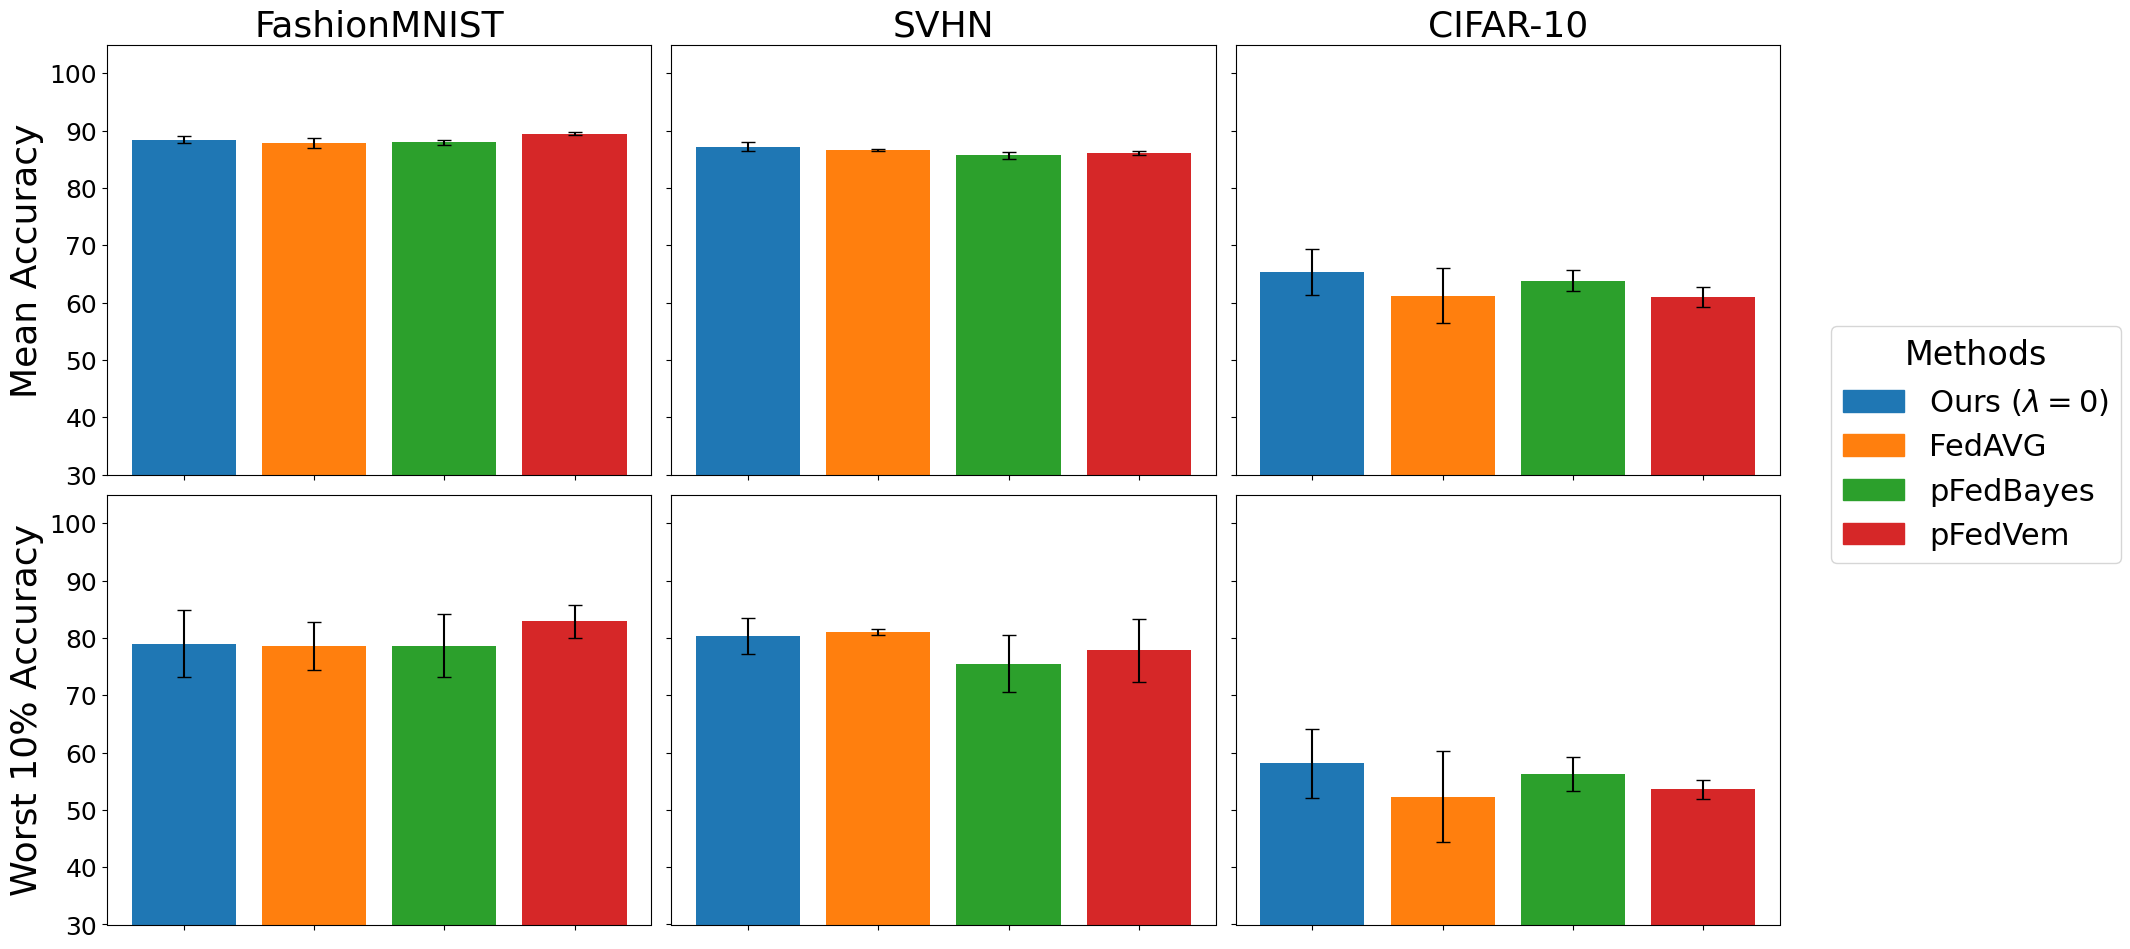

In [ ]:

df_mean = make_long_form(df_plot, 'ACC_avg_global_local_avg', 'ACC_avg_global_local_std', 'mean')
df_worst = make_long_form(df_plot, 'ACC_worst_global_local_avg', 'ACC_worst_global_local_std', 'worst')

df_long = pd.concat([df_mean, df_worst])

#selected methods
#selected_methods = ['Ours', 'pFedBayes', 'pFedVem',  'wb_3', 'rkl_3']
selected_methods = ['FedAVG', 'Ours', 'pFedBayes', 'pFedVem']
df_long = df_long[df_long['method'].isin(selected_methods)]

methods_legend = {
    'FedAVG': 'FedAVG', 
    'Ours': r'Ours ($\lambda=0$)',
    'pFedBayes': 'pFedBayes',
    'pFedVem': 'pFedVem',
    'FedPop': 'FedPop', 
    'wb_3': 'BA-BFL WB',
    'rkl_3': 'BA-BFL RKLB'
}

methods_legend = [methods_legend[m] for m in df_long['method'].unique()]

# Dataset names for titles
dataset_names = {
    'cifar10': 'CIFAR-10',
    'svhn': 'SVHN',
    'fmnist': 'FashionMNIST'
}


# Set up the figure: 2 rows (mean/worst), 3 cols (datasets)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey='row')

# Dataset list
datasets = ['fmnist', 'svhn', 'cifar10']  

# Plot per dataset
for i, dataset in enumerate(datasets):
    # Top row: mean acc
    data_mean = df_long[(df_long['dataset'] == dataset) & (df_long['acc_type'] == 'mean')]
    axes[0, i].bar(
        data_mean['method'], data_mean['acc'], yerr=data_mean['std'], capsize=5,
        color=[method_colors[m] for m in data_mean['method']]
    )
    axes[0, i].set_ylim(30, 105)
    axes[0, i].set_xticklabels([])
    axes[0,i].tick_params(axis='y', labelsize=18)

    # Bottom row: worst acc
    data_worst = df_long[(df_long['dataset'] == dataset) & (df_long['acc_type'] == 'worst')]
    axes[1, i].bar(
        data_worst['method'], data_worst['acc'], yerr=data_worst['std'], capsize=5,
        color=[method_colors[m] for m in data_worst['method']]
    )
    axes[1, i].set_ylim(30, 105)
    axes[1, i].set_xticklabels([])
    axes[1,i].tick_params(axis='y', labelsize=18)


    axes[0, i].set_title(f"{dataset_names[dataset]}", fontsize=26)


axes[0, 0].set_ylabel('Mean Accuracy', fontsize=26)
axes[1, 0].set_ylabel('Worst 10% Accuracy', fontsize=26)


# Common legend
handles = [plt.Rectangle((0,0),1,1, color=method_colors[m]) for m in df_long['method'].unique()]
labels = df_long['method'].unique()
fig.legend(
    handles, methods_legend,
    loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0,
    title='Methods', title_fontsize=24, fontsize=22
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('global_on_local.pdf', bbox_inches='tight')
plt.show()


## HBDL Analysis

In [84]:
df_all_cifar10

,ACC_avg_global_local_avg,ACC_avg_global_local_std,ACC_avg_local_global_avg,ACC_avg_local_global_std,ACC_avg_local_local_avg,ACC_avg_local_local_std,ACC_avg_perso_global_avg,ACC_avg_perso_global_std,ACC_avg_perso_local_avg,ACC_avg_perso_local_std,ACC_worst_global_local_avg,ACC_worst_global_local_std,ACC_worst_local_global_avg,ACC_worst_local_global_std,ACC_worst_local_local_avg,ACC_worst_local_local_std,ACC_worst_perso_global_avg,ACC_worst_perso_global_std,ACC_worst_perso_local_avg,ACC_worst_perso_local_std
Ours,65.393001,4.047245,47.457666,2.823999,76.786527,0.322492,57.754667,2.480837,76.82042,0.420484,58.088984,6.024016,37.723334,1.079554,68.266665,0.585946,45.28,0.919838,70.633334,0.635084
FedAVG,61.240459,4.775228,45.888667,2.200299,74.803365,1.011177,NaN,NaN,NaN,NaN,52.314682,7.865436,36.783333,0.263122,65.800001,1.646205,NaN,NaN,NaN,NaN
pFedBayes,63.853553,1.863119,44.482000,1.854779,71.844210,1.785929,NaN,NaN,NaN,NaN,56.243856,2.969608,34.106665,0.506493,60.333125,1.742825,NaN,NaN,NaN,NaN
pFedVem,60.983837,1.779494,45.879000,1.795082,72.612714,1.819438,NaN,NaN,NaN,NaN,53.549632,1.575975,36.150000,1.297228,64.141613,2.708176,NaN,NaN,NaN,NaN
FedPop,4.810413,4.323047,52.046000,3.330685,80.510467,1.989004,NaN,NaN,NaN,NaN,0.032268,0.055891,40.436666,2.584420,72.629868,3.336125,NaN,NaN,NaN,NaN
wb_1,63.349718,3.749581,46.775000,1.768128,75.963124,0.940596,NaN,NaN,NaN,NaN,55.563469,5.171932,37.606667,2.350858,67.833336,1.115052,NaN,NaN,NaN,NaN
wb_2,64.843376,5.350936,48.789666,2.666414,77.846282,0.758517,NaN,NaN,NaN,NaN,56.789917,8.523002,37.813333,1.423601,70.633336,0.945157,NaN,NaN,NaN,NaN
wb_3,63.973891,4.856244,48.864998,2.186853,78.922525,0.966366,NaN,NaN,NaN,NaN,54.092205,8.107199,39.066666,1.581782,71.033335,2.081665,NaN,NaN,NaN,NaN
rkl_1,63.323201,4.135616,46.479999,2.388263,75.909840,1.277430,NaN,NaN,NaN,NaN,55.691348,5.502496,37.013332,1.390048,67.633336,3.385752,NaN,NaN,NaN,NaN
rkl_2,64.993522,5.991545,48.620999,2.106136,77.966382,0.843050,NaN,NaN,NaN,NaN,56.649518,8.075848,38.016666,1.105547,70.500005,1.135780,NaN,NaN,NaN,NaN


### Global on Local

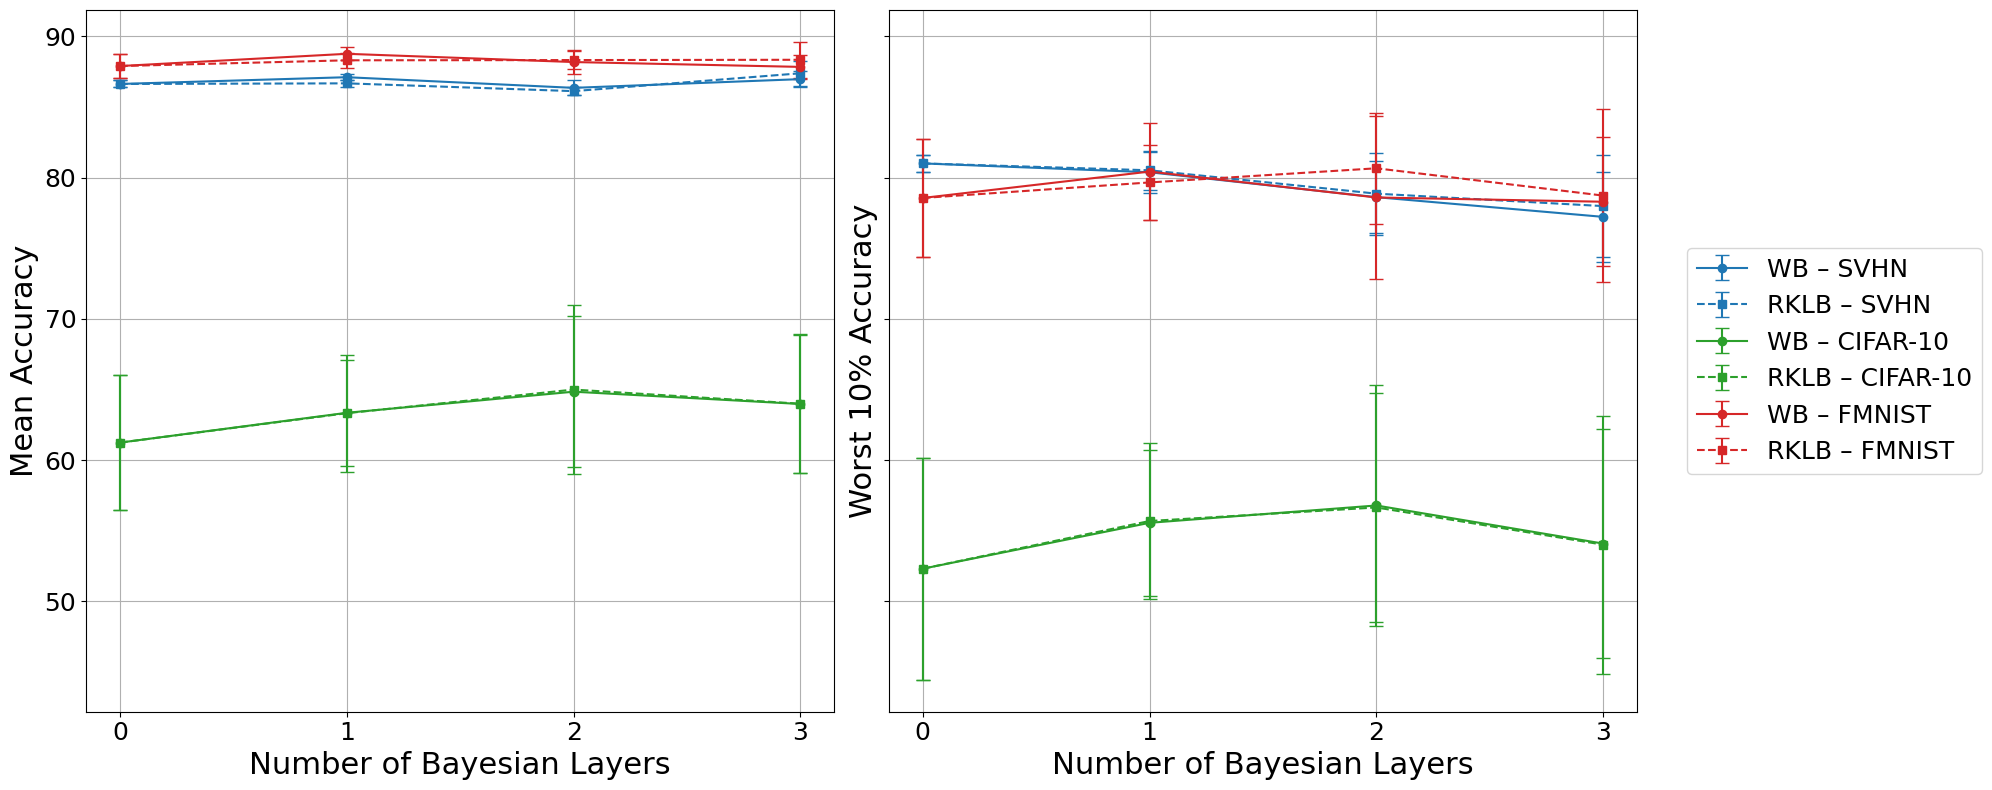

In [110]:
x_values = np.array([0, 1, 2, 3])
x_ticks = ['0-FedAVG', '1', '2', '3']

def extract_vals(df, prefix, kind='mean'):
    if kind == 'mean':
        avg = df.loc[[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'], 'ACC_avg_global_local_avg']
        std = df.loc[[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'], 'ACC_avg_global_local_std']
    elif kind == 'worst':
        avg = df.loc[[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'], 'ACC_worst_global_local_avg']
        std = df.loc[[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'], 'ACC_worst_global_local_std']
    return np.array(avg), np.array(std)

datasets = {
    'SVHN': (df_all_svhn, 'tab:blue'),
    'CIFAR-10': (df_all_cifar10, 'tab:green'),
    'FMNIST': (df_all_fmnist, 'tab:red')
}

fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for ax, kind, ylabel in zip(
    axs,
    ['mean', 'worst'],
    ['Mean Accuracy', 'Worst 10% Accuracy']
):
    

    for name, (df, color) in datasets.items():
        wb_avg, wb_std = extract_vals(df, 'wb', kind=kind)
        rkl_avg, rkl_std = extract_vals(df, 'rkl', kind=kind)
        
        if kind == 'mean': 
            fedavg_avg = df.loc['FedAVG', 'ACC_avg_global_local_avg']
            fedavg_std = df.loc['FedAVG', 'ACC_avg_global_local_std']
        else: 
            fedavg_avg = df.loc['FedAVG', 'ACC_worst_global_local_avg']
            fedavg_std = df.loc['FedAVG', 'ACC_worst_global_local_std']



        # Prepend FedAVG value to WB
        wb_avg_full = np.insert(wb_avg, 0, fedavg_avg)
        wb_std_full = np.insert(wb_std, 0, fedavg_std)

        # Prepend FedAVG value to RKLB
        rkl_avg_full = np.insert(rkl_avg, 0, fedavg_avg)
        rkl_std_full = np.insert(rkl_std, 0, fedavg_std)

        ax.errorbar(x_values, wb_avg_full, yerr=wb_std_full, fmt='-o', capsize=5,
                    label=f'WB – {name}', color=color)
        ax.errorbar(x_values, rkl_avg_full, yerr=rkl_std_full, fmt='--s', capsize=5,
                    label=f'RKLB – {name}', color=color)


    ax.set_xlabel('Number of Bayesian Layers', fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xticks(x_values)
    ax.set_xticklabels(['0', '1', '2', '3'], fontsize=18)
    ax.tick_params(axis='y', labelsize=18) 

    ax.grid(True)

axs[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=18)

plt.tight_layout()
plt.savefig('HBDL.pdf', bbox_inches='tight')
plt.show()
